In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv( r'C:\Users\Compu Market\Downloads\Depi_graduation_project\week two\data_cleaned.csv')                     #'Data/vaccination_tweets.csv'

In [4]:
df.head()

,Unnamed:,label,cleaned_text
0,799999,1,love healthuandpets u guy r best
1,800000,1,im meting one besties tonight cant wait girl talk
2,800001,1,darealsunisakim thanks twiter ad sunisa got me...
3,800002,1,sick realy cheap hurt much eat real fod plus f...
4,800003,1,lovesbroklyn efect everyone


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed:      40000 non-null  int64 
 1   label         40000 non-null  int64 
 2   cleaned_text  39996 non-null  object
dtypes: int64(2), object(1)
memory usage: 937.6+ KB


In [6]:
df.isnull().sum()

Unnamed:        0
label           0
cleaned_text    4
dtype: int64

In [7]:
df.columns

Index(['Unnamed:', 'label', 'cleaned_text'], dtype='object')

In [10]:
stemmer = PorterStemmer()

def stemming(data):
    if isinstance(data, str):
        text = [stemmer.stem(word) for word in data.split()]
        return ' '.join(text)
    else:
        return data

In [12]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: stemming(x))

In [13]:
df.head()

,Unnamed:,label,cleaned_text
0,799999,1,love healthuandpet u guy r best
1,800000,1,im mete one besti tonight cant wait girl talk
2,800001,1,darealsunisakim thank twiter ad sunisa got met...
3,800002,1,sick reali cheap hurt much eat real fod plu fr...
4,800003,1,lovesbroklyn efect everyon


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed:      40000 non-null  int64 
 1   label         40000 non-null  int64 
 2   cleaned_text  39996 non-null  object
dtypes: int64(2), object(1)
memory usage: 937.6+ KB


In [15]:
df['cleaned_text'] = df['cleaned_text'].fillna('')

In [16]:
from textblob import TextBlob

def polarity(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return None

In [17]:
df['polarity'] = df['cleaned_text'].apply(polarity)

In [18]:
df.head(10)

,Unnamed:,label,cleaned_text,polarity
0,799999,1,love healthuandpet u guy r best,0.750000
1,800000,1,im mete one besti tonight cant wait girl talk,0.000000
2,800001,1,darealsunisakim thank twiter ad sunisa got met...,0.000000
3,800002,1,sick reali cheap hurt much eat real fod plu fr...,0.021429
4,800003,1,lovesbroklyn efect everyon,0.000000
5,800004,1,productofear tel burst laugh reali loud thank ...,0.200000
6,800005,1,rkeithil than respon ihad alreadi find answer,0.000000
7,800006,1,kepinupwkri jealou hope great time vega like a...,0.650000
8,800007,1,tomcfli ah congrat mr fletcher finali join twiter,0.000000
9,800008,1,evoip respond stupid cat help type forgiv eror,-0.800000


In [19]:
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label > 0:
        return "Positive"

In [20]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [21]:
df.head()

,Unnamed:,label,cleaned_text,polarity,sentiment
0,799999,1,love healthuandpet u guy r best,0.750000,Positive
1,800000,1,im mete one besti tonight cant wait girl talk,0.000000,Neutral
2,800001,1,darealsunisakim thank twiter ad sunisa got met...,0.000000,Neutral
3,800002,1,sick reali cheap hurt much eat real fod plu fr...,0.021429,Positive
4,800003,1,lovesbroklyn efect everyon,0.000000,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

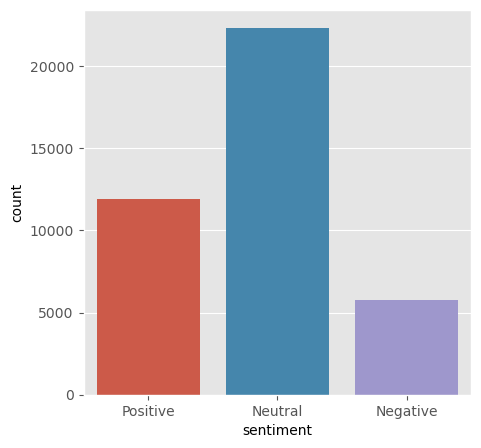

In [22]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(x='sentiment', data=df)

Text(0.5, 1.0, 'Distribution of sentiments')

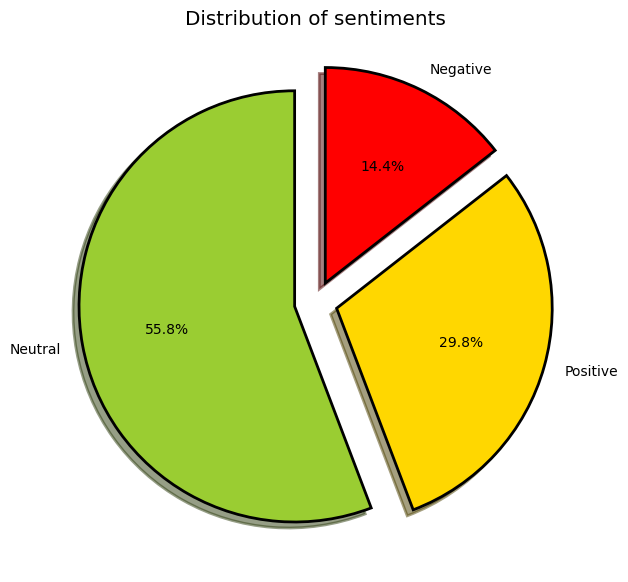

In [23]:
fig = plt.figure(figsize=(7, 7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth': 2, 'edgecolor': "black"}
tags = df['sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
          startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiments')

In [24]:
pos_tweets = df[df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending=False)
pos_tweets.head()

,Unnamed:,label,cleaned_text,polarity,sentiment
30945,10945,0,ugh tequila got best me im sori mismj tomorow ...,1.0,Positive
9901,809900,1,fashiontrix thank best wish,1.0,Positive
27649,7649,0,what best tol share pictur twiter notic henril...,1.0,Positive
22349,2349,0,rememb ive forgoten best friend birthday,1.0,Positive
38967,18967,0,sctw said godbi forum mate get onehd best leak...,1.0,Positive


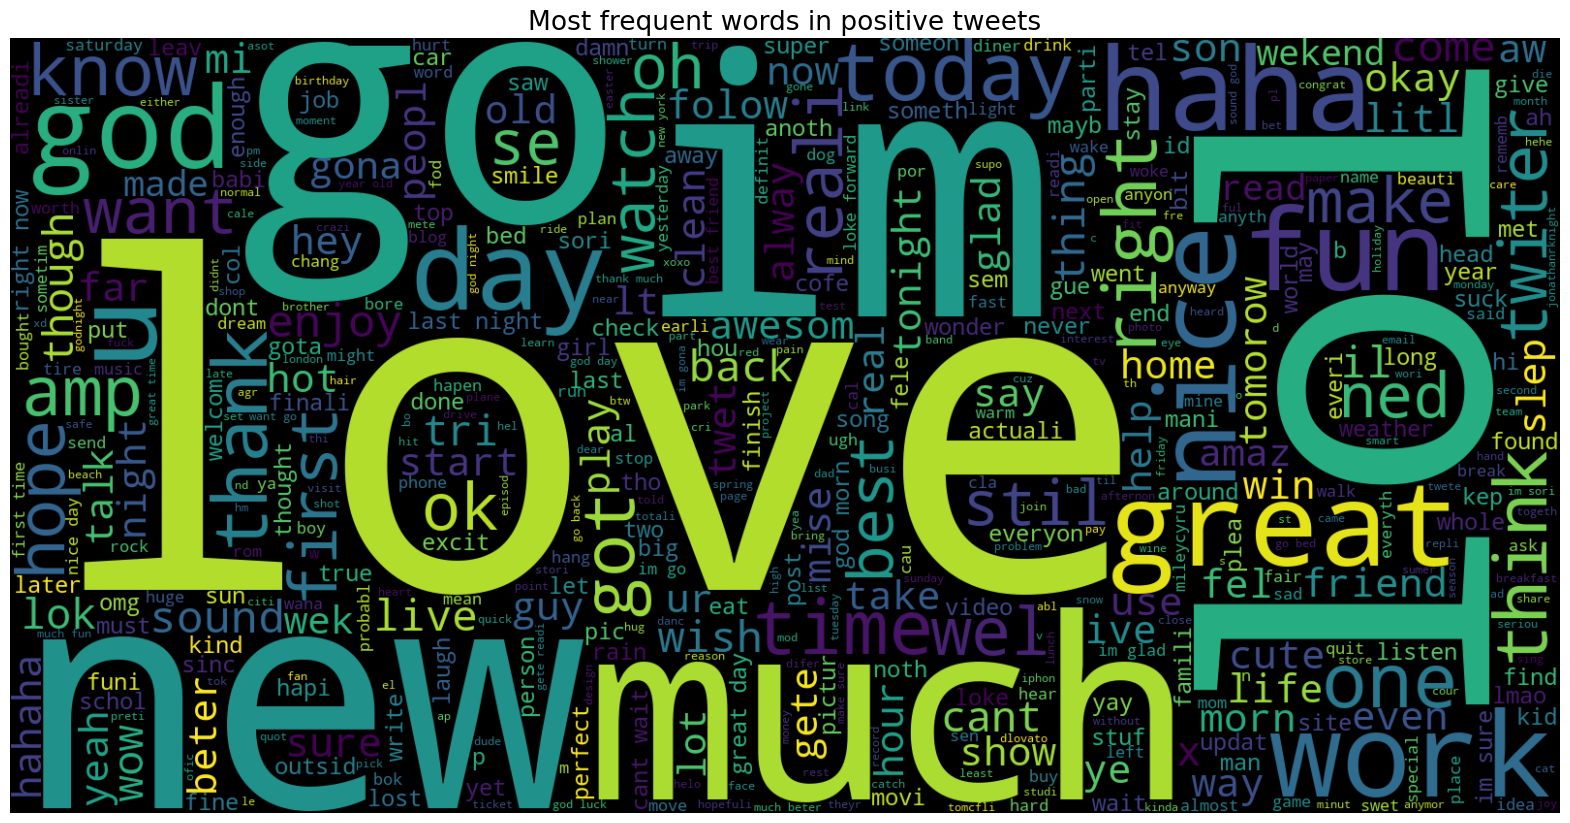

In [25]:
text = ' '.join([word for word in pos_tweets['cleaned_text']])
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [26]:
neg_tweets = df[df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending=False)
neg_tweets.head()

,Unnamed:,label,cleaned_text,polarity,sentiment
34031,14031,0,conc like piston round first time long time,-4.625929e-18,Negative
25278,5278,0,bore diner ever hate stuck hou want nice fod a...,-1.850372e-17,Negative
38040,18040,0,angesbiz slow internet fun anyon,-2.775558e-17,Negative
26868,6868,0,comput damn slow day fun,-2.775558e-17,Negative
3115,803114,1,philpeac half caf skini fairtrad pure ethiopia...,-4.761905e-04,Negative


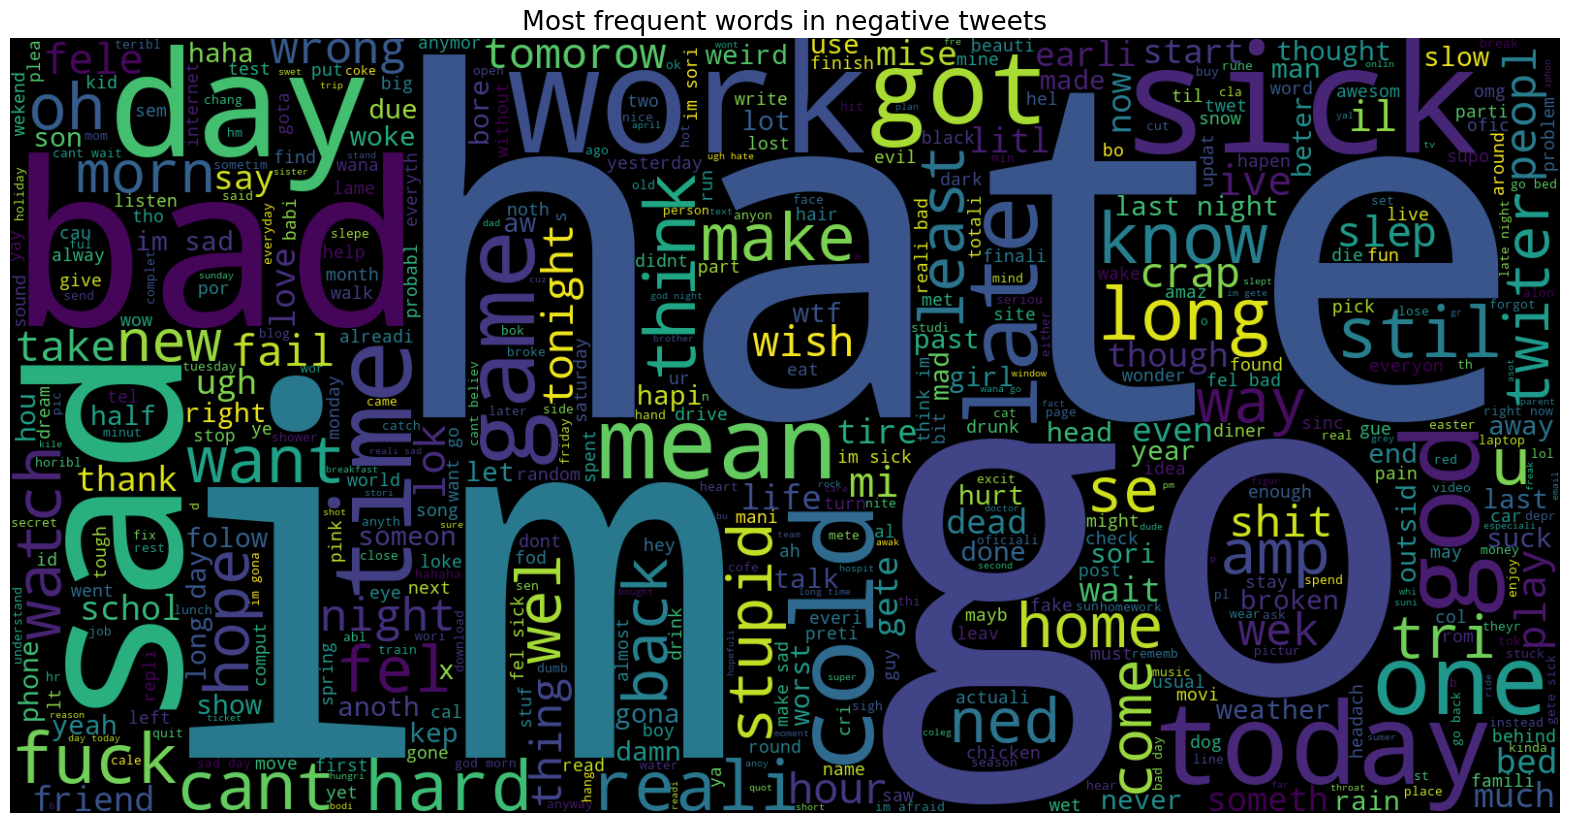

In [27]:
text = ' '.join([word for word in neg_tweets['cleaned_text']])
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [28]:
neutral_tweets = df[df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending=False)
neutral_tweets.head()

,Unnamed:,label,cleaned_text,polarity,sentiment
1,800000,1,im mete one besti tonight cant wait girl talk,0.0,Neutral
26867,6867,0,laurencetim argo disturbingli unev im disapoint,0.0,Neutral
26880,6880,0,djkitsun mese quotvictoryquot copi gla coke se...,0.0,Neutral
26878,6878,0,catchthesunx regan aliv australia dedic,0.0,Neutral
26877,6877,0,ned motiv,0.0,Neutral


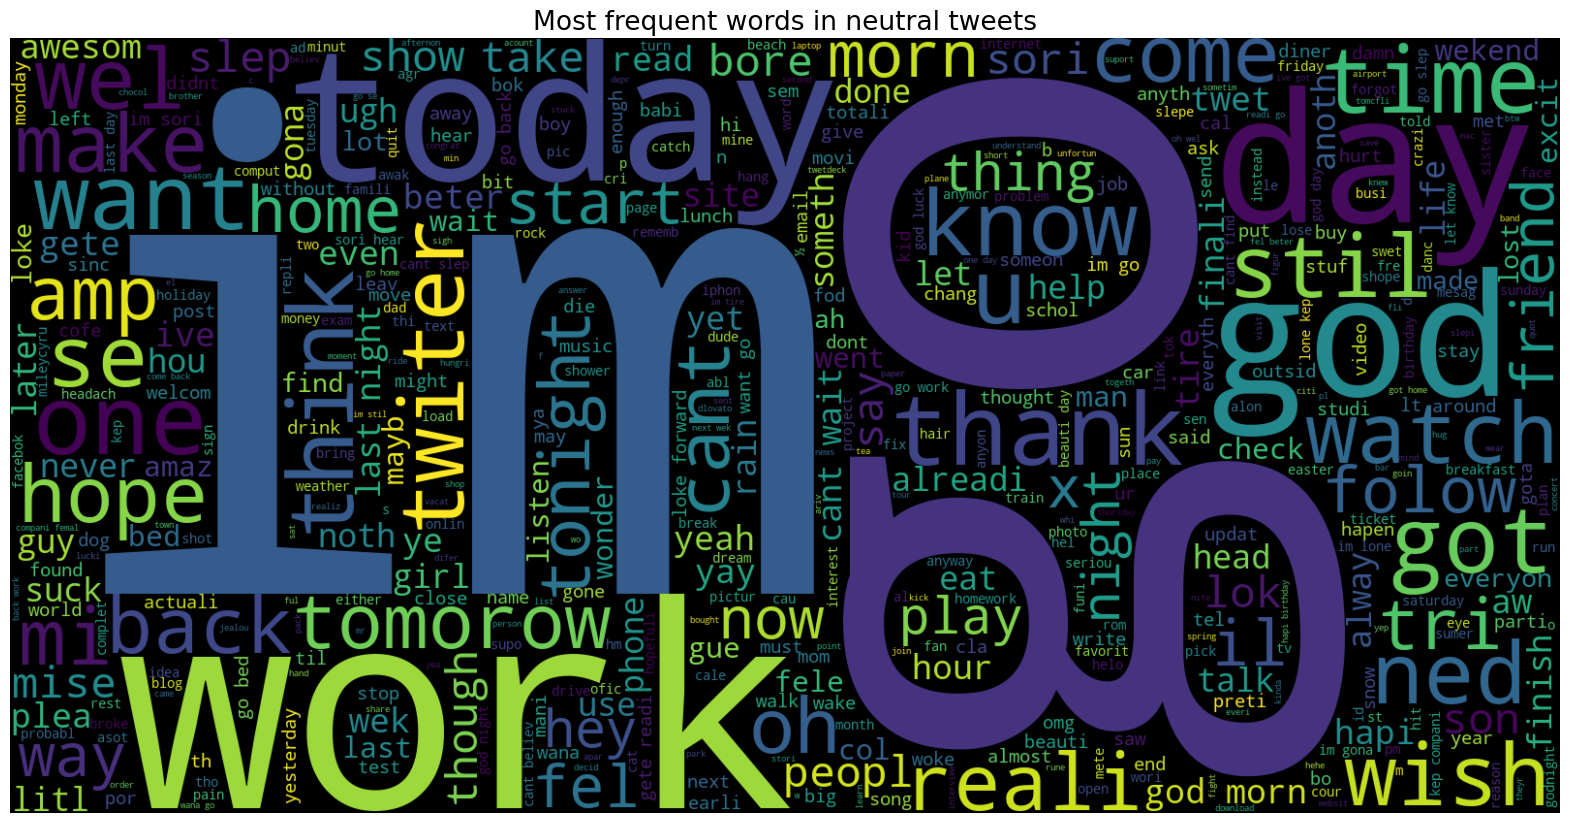

In [29]:
text = ' '.join([word for word in neutral_tweets['cleaned_text']])
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [30]:
vect = CountVectorizer(ngram_range=(1, 2)).fit(df['cleaned_text'])

In [31]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 237903

First 20 features:
 ['ab' 'ab amaz' 'ab cla' 'ab juic' 'ab minimum' 'ab motiv' 'ab tu'
 'ab watch' 'aba' 'aba last' 'aba shirt' 'ababybluey' 'ababybluey may'
 'ababybluey yea' 'abacab' 'abacab stil' 'abacab yepof' 'aback'
 'aback sinc' 'abalo']


In [32]:
X = df['cleaned_text']
Y = df['sentiment']
X = vect.transform(X)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [34]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (32000, 237903)
Size of y_train: (32000,)
Size of x_test: (8000, 237903)
Size of y_test: (8000,)


In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 95.84%


In [37]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[1045  116   40]
 [  14 4382   16]
 [  47  100 2240]]


              precision    recall  f1-score   support

    Negative       0.94      0.87      0.91      1201
     Neutral       0.95      0.99      0.97      4412
    Positive       0.98      0.94      0.96      2387

    accuracy                           0.96      8000
   macro avg       0.96      0.93      0.95      8000
weighted avg       0.96      0.96      0.96      8000



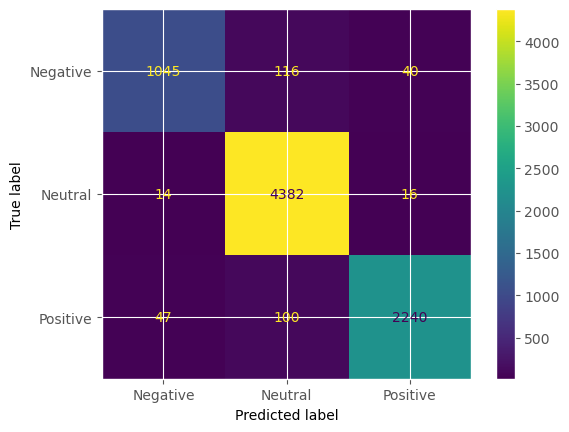

In [38]:
confusionMatrix = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
show = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=logreg.classes_)
show.plot()

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [41]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [42]:
y_pred = grid.predict(x_test)

In [43]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 96.49%


In [44]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[1072   89   40]
 [  11 4382   19]
 [  41   81 2265]]


              precision    recall  f1-score   support

    Negative       0.95      0.89      0.92      1201
     Neutral       0.96      0.99      0.98      4412
    Positive       0.97      0.95      0.96      2387

    accuracy                           0.96      8000
   macro avg       0.96      0.94      0.95      8000
weighted avg       0.96      0.96      0.96      8000



In [45]:
from sklearn.svm import LinearSVC

In [46]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [47]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 97.50%


In [48]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[1121   50   30]
 [  15 4382   15]
 [  41   49 2297]]


              precision    recall  f1-score   support

    Negative       0.95      0.93      0.94      1201
     Neutral       0.98      0.99      0.99      4412
    Positive       0.98      0.96      0.97      2387

    accuracy                           0.97      8000
   macro avg       0.97      0.96      0.97      8000
weighted avg       0.97      0.97      0.97      8000



In [50]:
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)

with open('vectorizer.pkl', 'wb') as vect_file:
    pickle.dump(vect, vect_file)

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.
